## Apple Marka Elektronik Eşyaların Yorumlarının Metin Madenciliği Yoluyla Değerlendirme

### Metin Madenciliği Nedir?

Metin Madenciliği, daha önce bilinmeyen veriyi yazılı kaynaklar sayesinde bilgisayar tarafından keşfedilmesidir. 
Yazıların ayıklanarak (farklı ,yazılı kaynaklardan) bilgileri otomatik olarak çıkararak verimize eklememize yardım eder.
Bu sayede daha fazla bilgiye sahip oluruz. 

###### Verimiz

In [3]:
import pandas as pd
data = pd.read_csv("/Users/umayyentur/IphoneData.csv", sep="\t")
data1 = data.copy()

In [4]:
data1.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,Was a gift for my husband and he loves it. Rep...,5.0
1,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,"Great price, extremely fast shipping works as ...",1.0
2,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,Moving from Android to Apple...my kids have th...,1.0
3,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,It is compatible with Verizon. Not pink but PE...,0.0
4,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,I love this phone! Thank you so much.,1.0


Verimizde görüldüğü üzere amacımız apple marka ürünlerle ilgili yapılan yorumları incelemektir. İnceleme sonucunda göre ürünlerle ilgili fikirler elde edebiliriz(Örneğin ürünler seviliyormu. Yada en çok hangi özellikleri tercih edilmiş gibi.) 

### Verimizi düzenleme

Verideki yorumlarda yazım yanlışları noktalama veya rakam kullanımı gibi bizim işimize yaramayan, yapacağımız işlemleri zorlaştırabilecek hatlalar olabilir. Bu yüzden ilk önce yorumları(Reviews) kısmını düzenleyerek başlıyoruz.

###### Gerekli paketler

In [9]:
%%capture
import nltk
from nltk.corpus import stopwords
from textblob import Word
from wordcloud import WordCloud
import matplotlib.pyplot as plt

İlk önce tüm kelimeleri küçük harf yaparak başlıyoruz.

In [10]:
data1["Reviews"] = data1["Reviews"].apply(lambda x: " ".join(str(item).lower() for item in str(x).split()))

Noktalama işaretlerini kaldırmak için

In [11]:
%%capture
data1["Reviews"] = data1["Reviews"].str.replace("[^\w\s]", "")

Yorumlardaki Sayıları silmek için

In [12]:
%%capture
data1["Reviews"] = data1["Reviews"].str.replace("\d", "")

#### StopWords ifadeleri

Stop words, önemsiz oldukları için doğal dil verilerinin işlenmesinden önce veya sonra filtrelenen bir durdurma listesindeki sözcüklerdir. Bir çok dilde mevcuttur. Verimizdeki yorumların hepsi ingilizce olduğu için ingilizce stopwords kelimeleri(Önreğin:I,me,we,etc..) verimizden çıkaracağız

In [13]:
stp = stopwords.words("english")
data1["Reviews"] = data1["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stp))

###### Lemmatizasyon

Lemmatizasyon, aynı kelimenin farklı çekimli biçimlerini bir araya gruplama sürecidir.

In [14]:
data1["Reviews"] = data1["Reviews"].apply(lambda x: " ".join(Word(i).lemmatize() for i in x.split()))

###### Terim frekanslarını hesaplanması

Terim Frekansı bir terimin dokümanda tekrarlanma sayısını temsil etmektedir.

In [15]:
frekanslar = data1["Reviews"].str.split(expand=True).stack().value_counts().reset_index()
frekanslar.columns = ["Kelime", "Frekans"]

###### Word Cloud

Bir "Word Cloud", kelime sıklığının görsel bir temsilidir. Terim, analiz edilen metinde ne kadar sık görülürse, oluşturulan görüntüde kelime o kadar büyük görünür.

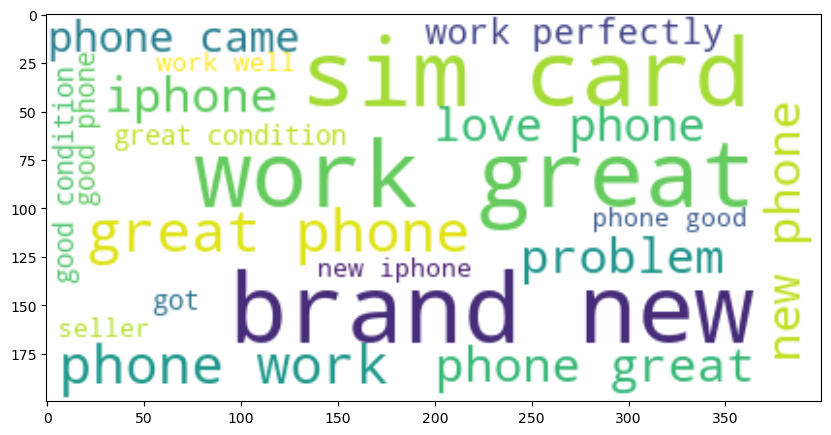

In [16]:
wrdcl = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(" ".join(data1["Reviews"]))
plt.figure(figsize=[10, 10])
plt.imshow(wrdcl, interpolation="bilinear")

Buraya bir yorum yapacağızda hadi hayırlısı

###### En çok kullanılan 10 kelime

<BarContainer object of 10 artists>

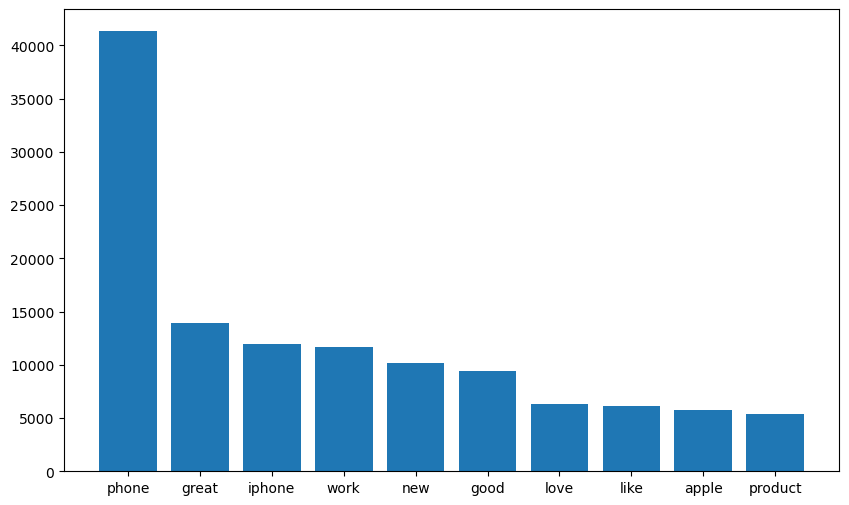

In [17]:
en_cok_kullanilan_kelimeler = frekanslar.nlargest(10, "Frekans")
plt.figure(figsize=(10, 6))
plt.bar(en_cok_kullanilan_kelimeler["Kelime"], en_cok_kullanilan_kelimeler["Frekans"])

Çoğunlukla yorumların apple marka telefonlar için yapıldığını söyleyebiliriz. Genel yorumlara bakıcak olursakta yorumların olumlu olduğunu(good,love,great sözcüklerinden yoka çıkarak) söyleyebiliriz.

### Kaynankça

Atenstaedt, Rob. “Word Cloud Analysis of the BJGP”. British Journal of General Practice, c. 62, sy 596, Mart 2012, ss. 148-148. bjgp.org, https://doi.org/10.3399/bjgp12X630142.

Saif, Hassan, vd. On Stopwords, Filtering and Data Sparsity for Sentiment Analysis of Twitter. 2014, ss. 810-17. oro.open.ac.uk, http://lrec2014.lrec-conf.org/en/.

Bao, 	Ho Tu . What Is Text Mining? https://www.jaist.ac.jp/~bao/MOT-Ishikawa/FurtherReadingNo1.pdf.


UÇKAN, Taner. “Text Classification”. 20.12.2019, s. 5, https://dergipark.org.tr/tr/download/article-file/898454#:~:text=Terim%20Frekans%C4%B1%20bir%20terimin%20dok%C3%BCmanda,daha%20y%C3%BCksek%20oldu%C4%9Fu%20kabul%20edilmektedir.&text=Ters%20terim%20frekans%C4%B1%20ise%20bir%20terimin%20birden%20fazla%20dokumanda%20bulunma%20s%C4%B1kl%C4%B1%C4%9F%C4%B1n%C4%B1%20belirtir.
